# Multiple Artificial Neural Network

This script will attempt to create a MANN for the reconstruction problem of EIT. Each network will be trained to output the pixel value of a single element in the output image.

The network inputs are the 208 diffrenetial voltages obtained from the reconstrution problem. As there are 576 pixels in each image object's element data ( `img.elem_data` ) there will be 576 individual networks used to generate each of the pixel values.


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
import time

from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Combo shapes with 576 outputs
# in_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/input_data.csv', delimiter=',', prefix="Trial", skiprows=0, header=None)
# out_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/output_data.csv', delimiter=',', prefix="Trial", skiprows=0, header=None)

# 10k circles with 256 outputs
in_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/b2c_nonoise_50k_tsc_input_data.csv', delimiter=',', prefix="Trial", skiprows=0, header=None)
out_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/b2c_nonoise_50k_tsc_output_data.csv', delimiter=',', prefix="Trial", skiprows=0, header=None)


input_data = in_df.values
output_data = out_df.values

output_pixels = output_data.shape[1]


In [0]:
# Define the Callbacks for the system

es = EarlyStopping(monitor='loss', mode = 'min', verbose = 1, patience = 100)
# mc1 = ModelCheckpoint('/content/gdrive/My Drive/ Colab Notebooks/networks/best_mann.h5',
#                       monitor='val_acc',
#                       mode= 'max',
#                       verbose=0,
#                       save_best_only = True)

In [0]:
# Number of networks
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

#Generic form of each network
l0 = tf.keras.layers.Dense(units=208, activation='relu', input_dim=208)  
l1 = tf.keras.layers.Dense(units=5, activation='relu')
l2 = tf.keras.layers.Dense(units=1, activation='linear')

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer= sgd)

#Create each model
mann = []
for x in tqdm(range(output_pixels)):
  mann.append(model)



100%|██████████| 256/256 [00:00<00:00, 220254.73it/s]

In [0]:
index = np.linspace(0,255,256)

for i in tqdm(index):
  j = int(i)
  mann[j].fit(input_data, np.array([output_data[:,j]]).T, shuffle=True, callbacks=[es], verbose=0)
   
    

## Evaluate the Netork Performance


100%|██████████| 256/256 [00:00<00:00, 1004.69it/s]

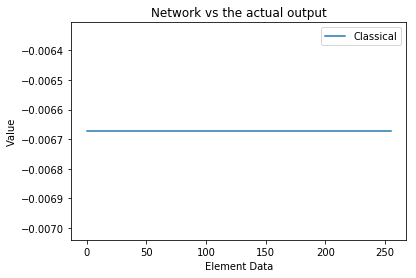

In [0]:
# select the a simulation 
x = 5

eval_input = np.array([input_data[x, :]])
actual_output = output_data[x, :]

index = np.linspace(0,255,256)
mann_output = np.zeros((256,1))
for i in tqdm(index):
  j = int(i)
  mann_output[j] = mann[j].predict(eval_input)
       

plt.title('Network vs the actual output')
plt.xlabel('Element Data')
plt.ylabel('Value')
# plt.plot(actual_output)
plt.plot(mann_output)
plt.legend(['Classical', 'Network'], loc = 'upper right');

In [0]:
print(actual_output.shape)
print(mann_out.shape)


# plt.title('Difference Plot')
# plt.xlabel('Element Data')
# plt.ylabel('Value')
# plt.plot(diff)


(256, 256)

In [0]:
j = 1
t = np.array([input_data[j,:]])

n1 = model1.predict(t)
print("Pixel 1: network:", n1, " actual:", output_data[j,1])

# n2 = model2.predict(t)
# print("Pixel 2: network:", n2, " actual:", output_data[j,45])

# n3 = model3.predict(t)
# print("Pixel 3: network:", n3, " actual:", output_data[j,250])

Pixel 1: network: [[-0.0017934]]  actual: -0.062876
Pixel 2: network: [[-0.0017934]]  actual: -0.036482
Pixel 3: network: [[-0.0017934]]  actual: -0.10780999999999999


In [0]:
# Function that will take the input and collect all of the outputs from the predicte outputs
# Input: a single input signal (1x208)
# Output: the network's best guess at the reconstruction problem (1x576)
  

In [0]:
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('MANN - Output')
plt.plot(n)

In [0]:
print('Predict pixel 1')
for x in arr:
  print(x.predict(t))